In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('C:\crop_yield.csv')

# Display dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop 'Production' (it's derived from Yield)
df.drop(columns=['Production'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


# 1.2 Encode Categorical Variables

In [2]:
encoder = LabelEncoder()
df['Crop'] = encoder.fit_transform(df['Crop'])
df['Season'] = encoder.fit_transform(df['Season'])
df['State'] = encoder.fit_transform(df['State'])


# 1.3 Normalize Numerical Features

In [3]:
scaler = StandardScaler()
df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']] = scaler.fit_transform(
    df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
)


# Step 2: Model Training in Python

In [4]:
X = df.drop(columns=['Yield'])  # Features
y = df['Yield']  # Target variable


# 2.2 Train Machine Learning Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


MAE: 10.345183166509226
MSE: 17376.03756699542
R2 Score: 0.9783135633559786


In [7]:
X_test['Actual_Yield'] = y_test
X_test['Predicted_Yield'] = y_pred_rf

# Save as CSV
X_test.to_csv("crop_yield_predictions.csv", index=False)
print("Predictions saved for Power BI!")


Predictions saved for Power BI!


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\dell\crop_yield_predictions.csv')

# Display the first few rows
print(df.head())


   Crop  Crop_Year  Season  State      Area  Annual_Rainfall  Fertilizer  \
0    36       2016       1     10 -0.245243        -0.654869   -0.253531   
1    24       1999       2     20 -0.234244         0.056978   -0.244625   
2    37       2016       5     17 -0.236877         2.937174   -0.243635   
3    38       2008       0     11 -0.204907        -0.174510   -0.209021   
4     8       2017       1     14 -0.233316        -0.780712   -0.239028   

   Pesticide  Actual_Yield  Predicted_Yield  
0  -0.228687      3.820000         3.443341  
1  -0.218563      1.395357         1.384763  
2  -0.218626      6.522727         6.621828  
3  -0.216470      0.812857         0.952204  
4  -0.213086      0.508000         0.818869  


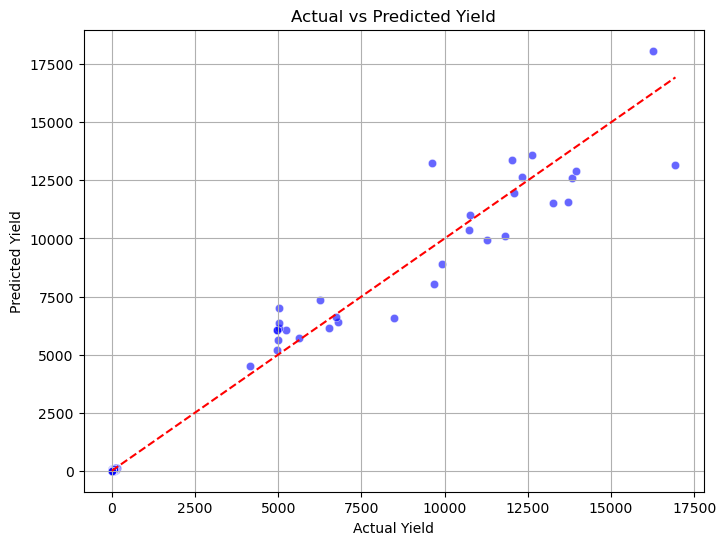

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Actual_Yield"], y=df["Predicted_Yield"], alpha=0.6, color="blue")

# Plot reference line (y = x)
plt.plot([df["Actual_Yield"].min(), df["Actual_Yield"].max()], 
         [df["Actual_Yield"].min(), df["Actual_Yield"].max()], 
         linestyle="--", color="red")

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.grid(True)
plt.show()


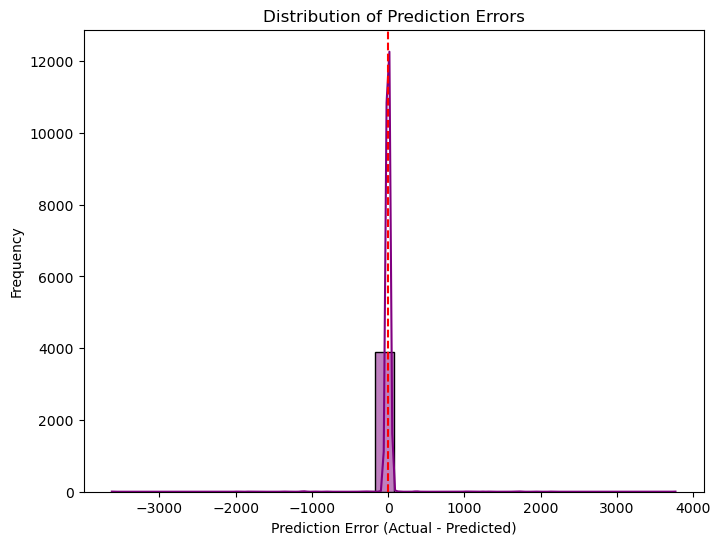

In [13]:
df["Error"] = df["Actual_Yield"] - df["Predicted_Yield"]

plt.figure(figsize=(8,6))
sns.histplot(df["Error"], bins=30, kde=True, color="purple")

plt.axvline(x=0, color="red", linestyle="--")  # Reference line at zero error
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


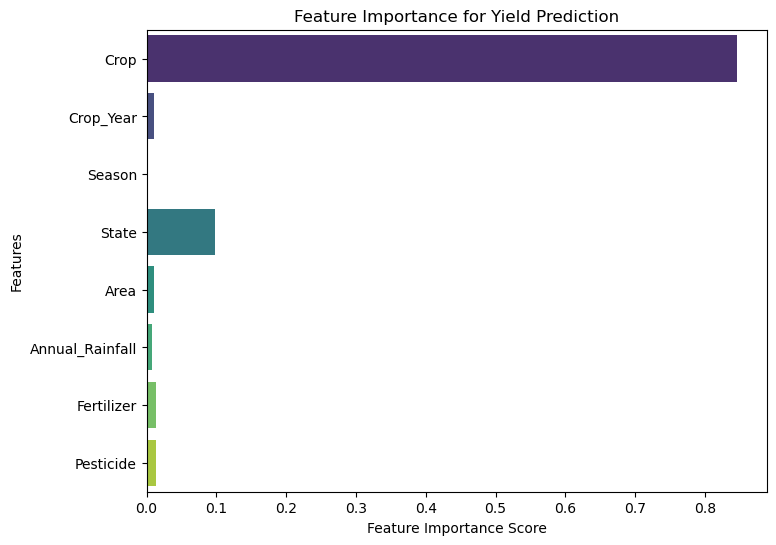

In [14]:
import numpy as np

# Assuming rf_model is the trained model
feature_importance = rf_model.feature_importances_
features = X.columns  # Extract feature names

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance, y=features, palette="viridis")

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Yield Prediction")
plt.show()


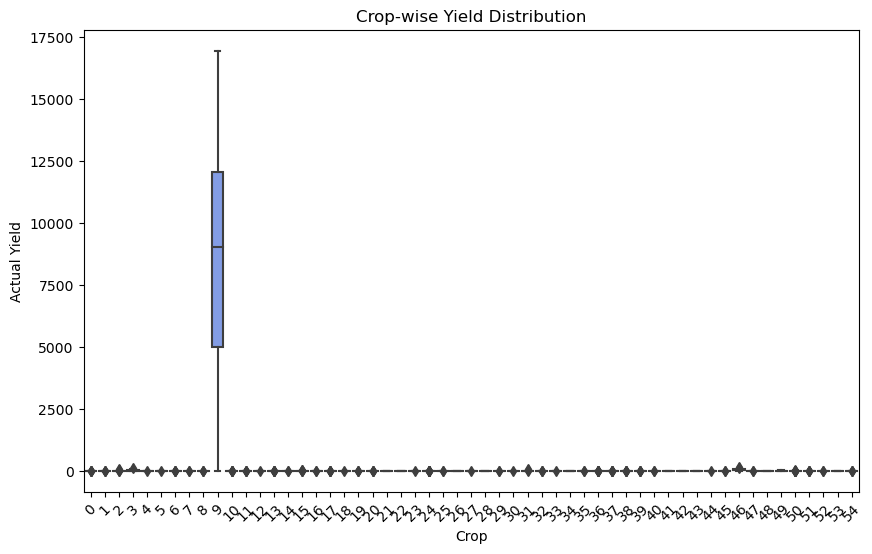

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Crop"], y=df["Actual_Yield"], palette="coolwarm")

plt.xlabel("Crop")
plt.ylabel("Actual Yield")
plt.title("Crop-wise Yield Distribution")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


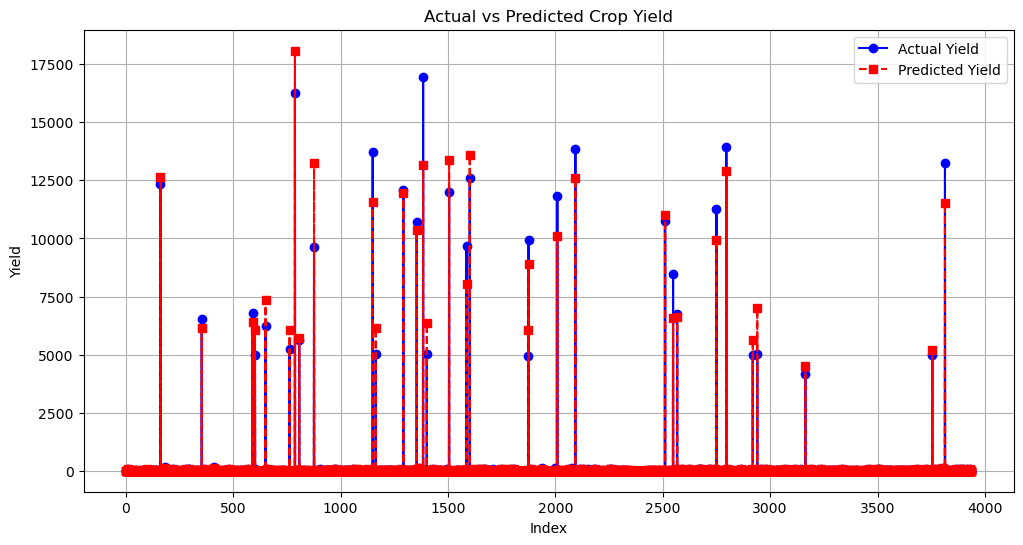

In [16]:
plt.figure(figsize=(12, 6))

# Plot Actual Yield
plt.plot(df.index, df['Actual_Yield'], label="Actual Yield", marker='o', linestyle='-', color='blue')

# Plot Predicted Yield
plt.plot(df.index, df['Predicted_Yield'], label="Predicted Yield", marker='s', linestyle='--', color='red')

plt.xlabel("Index")
plt.ylabel("Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
jupyter nbconvert --to html your_notebook.ipynb



SyntaxError: invalid syntax (717899306.py, line 1)